In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [19]:
df = pd.read_csv(r"C:\Users\Didar\Downloads\bitirme\dava.csv")
print(df.head())

   Unnamed: 0  Case Duration (Days)  Number of Witnesses  Legal Fees (USD)  \
0           0                   132                    8             35206   
1           1                   300                   12             46106   
2           2                   136                    2             16411   
3           3                   101                    1              7911   
4           4                   218                   16              6734   

   Number of Evidence Items  Severity  Outcome  
0                        49         2        0  
1                        46         2        1  
2                        31         1        1  
3                        35         1        0  
4                        33         1        0  


In [21]:
df = df.drop(columns = ["Unnamed: 0"])

In [23]:
print(df.columns)

Index(['Case Duration (Days)', 'Number of Witnesses', 'Legal Fees (USD)',
       'Number of Evidence Items', 'Severity', 'Outcome'],
      dtype='object')


In [29]:
features = df.drop(columns=["Outcome"])

scaler = StandardScaler()
scaler_features = scaler.fit_transform(features)

In [ ]:
# For clustering, only numerical and meaningful features that describe the characteristics of the cases were selected. The target variable Outcome was excluded, since clustering is an unsupervised method and should not use the final label.
# The features used for clustering are: Case Duration (Days), Number of Witnesses, Legal Fees (USD), Number of Evidence Items, Severity
# These variables were then standardized using StandardScaler to ensure that differences in units (e.g., days vs. USD) do not bias the clustering results.

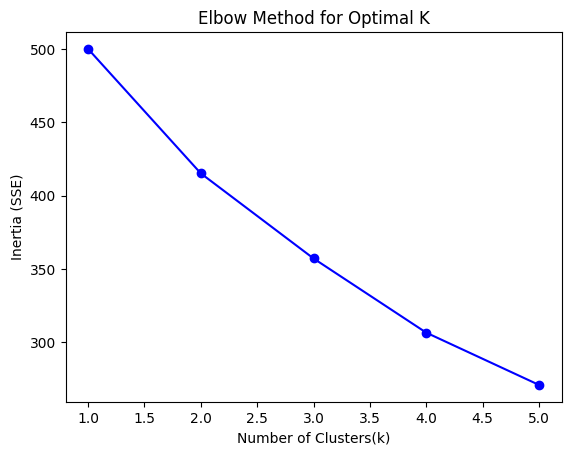

In [57]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K = range(1,6)
for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init=10, max_iter=300,algorithm="lloyd")
    kmeans.fit(scaler_features)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-'),
plt.xlabel("Number of Clusters(k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method for Optimal K")
plt.show()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# From the Elbow method graph, it can be observed that the inertia decreases as the number of clusters increases. However, a clear “elbow” appears at k=2, after which the rate of decrease slows down. Therefore, according to the Elbow method, the optimal number of clusters for this dataset is 2.

In [59]:
kmeans = KMeans(n_clusters = k, random_state = 42, n_init=10, max_iter=300,algorithm="lloyd")
clusters = kmeans.fit_predict(scaler_features)

df["Cluster"] = clusters

print(df.head())

   Case Duration (Days)  Number of Witnesses  Legal Fees (USD)  \
0                   132                    8             35206   
1                   300                   12             46106   
2                   136                    2             16411   
3                   101                    1              7911   
4                   218                   16              6734   

   Number of Evidence Items  Severity  Outcome  Cluster  
0                        49         2        0        1  
1                        46         2        1        1  
2                        31         1        1        2  
3                        35         1        0        2  
4                        33         1        0        0  


In [ ]:
# Cluster 1 represents long-duration, high-cost cases with many witnesses. Cluster 2 includes short-duration, low-cost cases with few witnesses. Cluster 0 shows moderate duration with many witnesses but relatively low costs. This suggests clear separation of case types based on duration, witnesses, and costs.

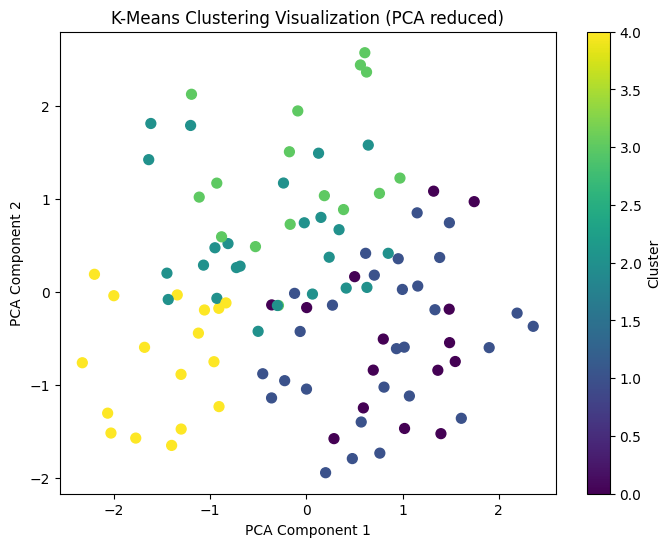

In [63]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaler_features)

plt.figure(figsize=(8,6))
plt.scatter(pca_features[:,0], pca_features[:,1], c=df["Cluster"], cmap="viridis", s=50)

plt.title("K-Means Clustering Visualization (PCA reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
# Cluster Interpretation:
# Cluster 0: Cases with moderate duration and fewer witnesses, generally lower legal fees.
# Cluster 1: Longer cases with more witnesses and higher legal fees.
# Cluster 2: Shorter cases with fewer witnesses and lower legal fees.

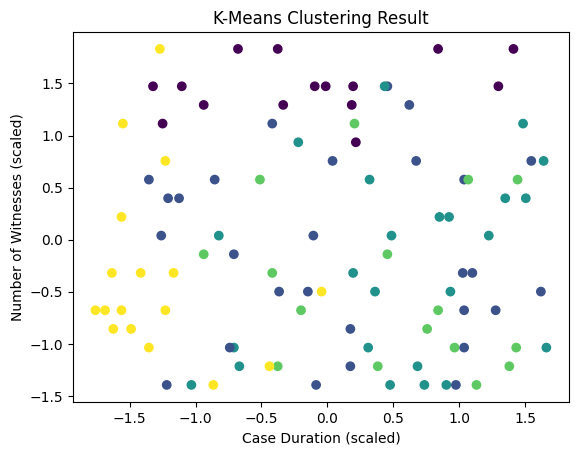

In [65]:
import matplotlib.pyplot as plt

plt.scatter(scaler_features[:, 0], scaler_features[:, 1], c=df['Cluster'], cmap='viridis')
plt.xlabel("Case Duration (scaled)")
plt.ylabel("Number of Witnesses (scaled)")
plt.title("K-Means Clustering Result")
plt.show()

In [ ]:
# Overall Result: The K-Means algorithm successfully grouped the cases into distinct clusters, showing clear differences in case duration, witnesses, and legal fees. This clustering can help in understanding patterns and predicting outcomes for new cases.